In [1]:
import numpy as np
import pandas as pd

In [33]:
# Keras fachion mnist dataset 다운로드
from tensorflow.keras.datasets import fashion_mnist, mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


In [34]:
print("train dataset shape : ", train_images.shape, train_labels.shape)
print("test dataset shape : ", test_images.shape, test_labels.shape)

train dataset shape :  (60000, 28, 28) (60000,)
test dataset shape :  (10000, 28, 28) (10000,)


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

NameError: name 'train_images' is not defined

NameError: name 'nclos' is not defined

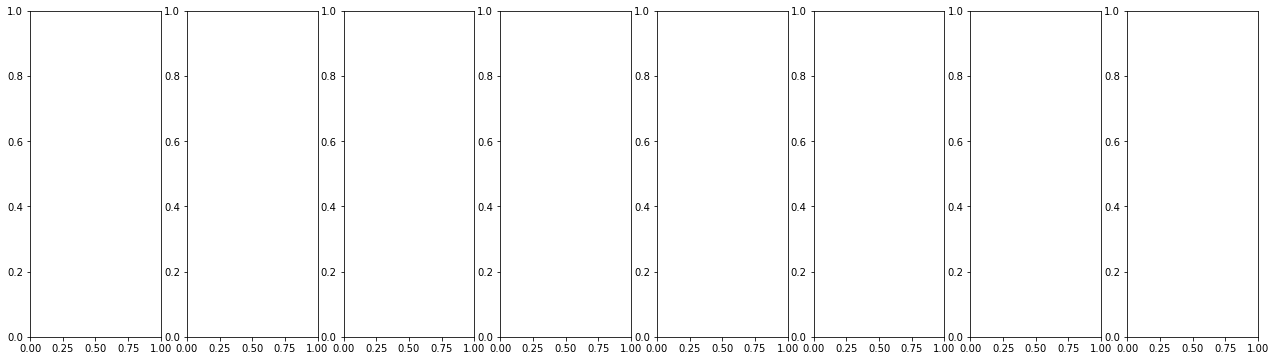

In [36]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(nclos):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
       

    
    
    
for x in range(0,5):
    show_images(train_images[x*8:(x+1)*8], train_labels[:8], ncols=8)

In [37]:
# 데이터 전처리 수행
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, teat_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape : ", train_images.shape, train_labels.shape)
print("test dataset shape : ", test_images.shape, test_labels.shape)

train dataset shape :  (60000, 28, 28) (60000,)
test dataset shape :  (10000, 28, 28) (10000,)


In [38]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

In [40]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)), # Flatten 1차원으로 바꿔주는 역할
    Dense(100, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(10, activation = 'softmax')
    
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 모델의 Loss와 Optimizer 설정하고 학습 수행
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# sparse_categorical_crossentropy
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 2s 840us/step - loss: 0.2725 - accuracy: 0.9202
Epoch 2/20
1875/1875 [==============================] - 2s 827us/step - loss: 0.1213 - accuracy: 0.9631
Epoch 3/20
1875/1875 [==============================] - 2s 825us/step - loss: 0.0866 - accuracy: 0.9732
Epoch 4/20
1875/1875 [==============================] - 2s 833us/step - loss: 0.0666 - accuracy: 0.9793
Epoch 5/20
1875/1875 [==============================] - 2s 843us/step - loss: 0.0524 - accuracy: 0.9835
Epoch 6/20
1875/1875 [==============================] - 2s 833us/step - loss: 0.0441 - accuracy: 0.9862
Epoch 7/20
1875/1875 [==============================] - 2s 886us/step - loss: 0.0361 - accuracy: 0.9884
Epoch 8/20
1875/1875 [==============================] - 2s 874us/step - loss: 0.0299 - accuracy: 0.9901
Epoch 9/20
1875/1875 [==============================] - 2s 880us/step - loss: 0.0249 - accuracy: 0.9918
Epoch 10/20
1875/1875 [==============================] - 2s 849u

In [45]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.2725159227848053, 0.12127785384654999, 0.0865749642252922, 0.0665866807103157, 0.05236179754137993, 0.04407799243927002, 0.03606750816106796, 0.029924076050519943, 0.024949170649051666, 0.023439621552824974, 0.01959824562072754, 0.017778152599930763, 0.01532873697578907, 0.016232505440711975, 0.015904132276773453, 0.014406557194888592, 0.012854319997131824, 0.01105575356632471, 0.012699742801487446, 0.009049505926668644]
[0.9202166795730591, 0.9630500078201294, 0.9732333421707153, 0.9793000221252441, 0.9835333228111267, 0.9862333536148071, 0.9884499907493591, 0.990149974822998, 0.9918166399002075, 0.9922000169754028, 0.9939166903495789, 0.9941499829292297, 0.9950166940689087, 0.9945166707038879, 0.9950000047683716, 0.9953500032424927, 0.9956333041191101, 0.9962000250816345, 0.9956499934196472, 0.996833324432373]


In [46]:
test_images.shape

(10000, 28, 28)

In [47]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [48]:
pred_proba[0]

array([2.1861012e-15, 2.4008435e-15, 1.3755903e-13, 3.7055975e-12,
       4.9353873e-16, 2.6020344e-14, 9.3899459e-22, 1.0000000e+00,
       8.4955101e-15, 4.0747583e-12], dtype=float32)

# CNN

In [5]:
import numpy as np
import pandas as pd

# CIFAR10 Dataset 생성

In [10]:
from tensorflow.keras.datasets import cifar10

In [11]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape : ", train_images.shape, train_labels.shape)
print("test dataset shape : ", test_images.shape, test_labels.shape)

train dataset shape :  (50000, 32, 32, 3) (50000, 1)
test dataset shape :  (10000, 32, 32, 3) (10000, 1)


- train dataset shape :  (50000, 32, 32, 3(RGB값으로 채널을 말함=3차원)) (50000, 1)(2차원)
- test dataset shape :  (10000, 32, 32, 3) (10000, 1)

In [12]:
#array로 첫번째 이미지 출력
train

NameError: name 'train' is not defined

In [13]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'beer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


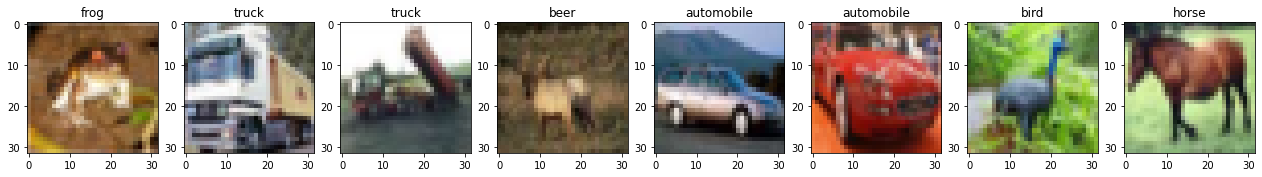

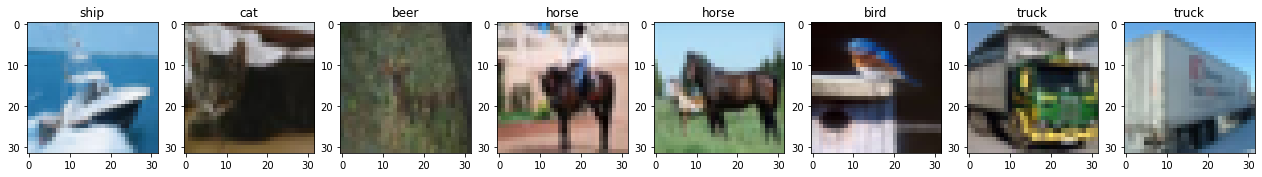

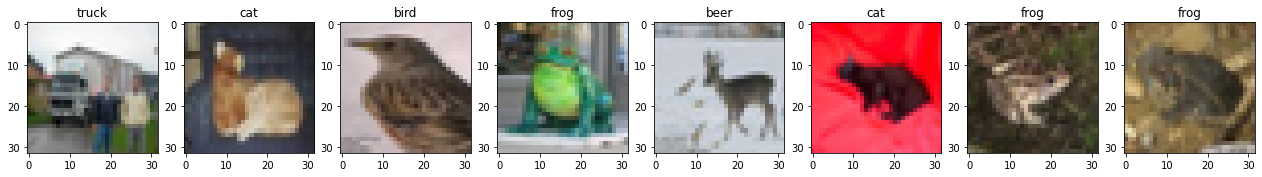

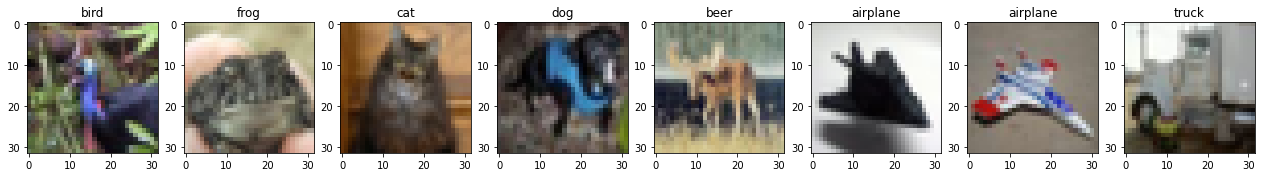

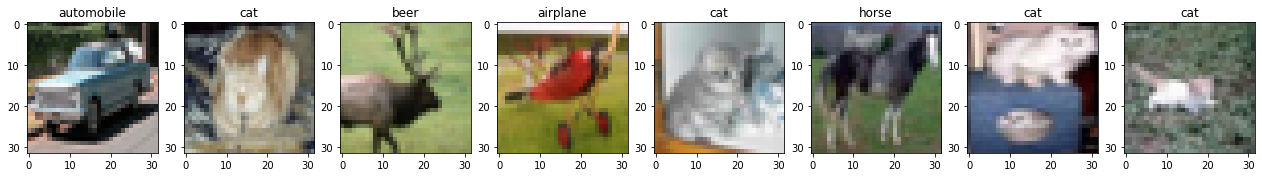

In [14]:
# DIFAR10 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze() # 2차원의 값을 1차원으로 변환해 준다.
        axs[i].set_title(NAMES[int(label)])
        
for x in range(0,5):
    show_images(train_images[x*8:(x+1)*8], train_labels[x*8:(x+1)*8], ncols=8)

In [15]:
# Data preprocessing
def get_preprocessed_data (images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32형 변형
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [16]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

# Custom Model 생성

In [1]:
IMAGE_SIZE = 32

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [3]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# x = Conv2D(fillters=32, kernel_size=(5,5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [4]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation = 'softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

In [17]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 118s 177ms/step - loss: 1.1212 - accuracy: 0.6013 - val_loss: 0.9764 - val_accuracy: 0.6513
Epoch 2/30
665/665 [==============================] - 131s 197ms/step - loss: 0.9545 - accuracy: 0.6626 - val_loss: 0.9709 - val_accuracy: 0.6588
Epoch 3/30
665/665 [==============================] - 140s 210ms/step - loss: 0.8497 - accuracy: 0.7023 - val_loss: 0.8754 - val_accuracy: 0.6885
Epoch 4/30
665/665 [==============================] - 143s 215ms/step - loss: 0.7593 - accuracy: 0.7340 - val_loss: 0.7714 - val_accuracy: 0.7341
Epoch 5/30
665/665 [==============================] - 145s 218ms/step - loss: 0.7002 - accuracy: 0.7521 - val_loss: 0.6904 - val_accuracy: 0.7593
Epoch 6/30
665/665 [==============================] - 148s 222ms/step - loss: 0.6374 - accuracy: 0.7762 - val_loss: 0.7097 - val_accuracy: 0.7531
Epoch 7/30
665/665 [==============================] - 147s 221ms/step - loss: 0.5945 - accuracy: 0.7908 - val_loss: 0.6459 -

KeyboardInterrupt: 